In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import imblearn
from sklearn import *
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [3]:
df=pd.read_csv("Steel_industry_data.csv")
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [4]:
df.shape

(35040, 11)

In [5]:
df.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

In [6]:
df.isnull().sum()

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

In [7]:
df['Year']=pd.to_datetime(df['date'],format="%d/%m/%Y %H:%M").dt.year

In [13]:
df['Mear']=pd.to_datetime(df['date'],format="%d/%m/%Y %H:%M").dt.month

In [14]:
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,Year,Mear
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load,2018,1
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load,2018,1
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load,2018,1
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load,2018,1
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load,2018,1


C:\Users\Somesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Load_Type', ylabel='count'>

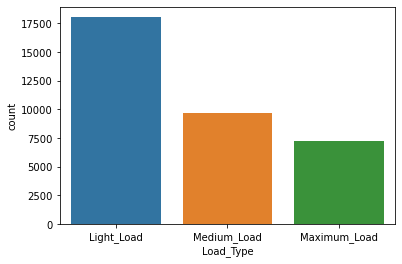

In [9]:
sns.countplot('Load_Type',data=df)

C:\Users\Somesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='WeekStatus', ylabel='count'>

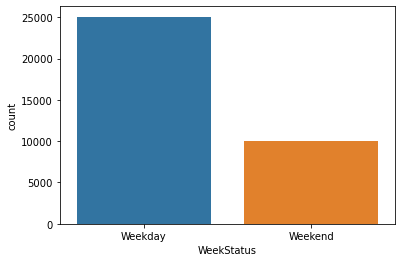

In [32]:
sns.countplot('WeekStatus',data=df)

C:\Users\Somesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


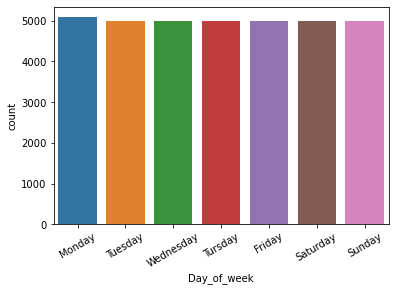

In [34]:
g=sns.countplot('Day_of_week',data=df)
g.set_xticklabels(labels=["Monday","Tuesday","Wednesday","Tursday","Friday","Saturday","Sunday"],rotation=30)
plt.show()

<AxesSubplot:xlabel='Load_Type', ylabel='Usage_kWh'>

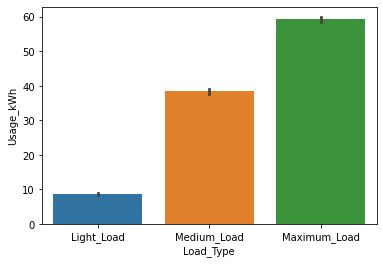

In [10]:
sns.barplot(x='Load_Type',y='Usage_kWh',data=df)

<AxesSubplot:xlabel='Year', ylabel='Usage_kWh'>

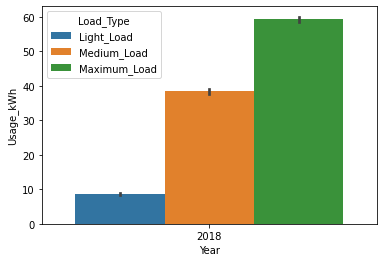

In [12]:
sns.barplot(x='Year',y='Usage_kWh',hue='Load_Type',data=df)

<AxesSubplot:xlabel='Mear', ylabel='Usage_kWh'>

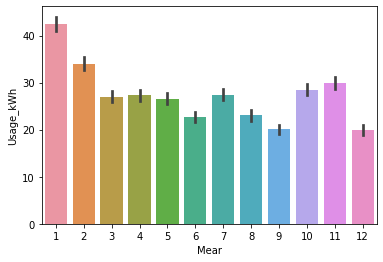

In [15]:
sns.barplot(x='Mear',y='Usage_kWh',data=df)

<AxesSubplot:xlabel='WeekStatus', ylabel='Usage_kWh'>

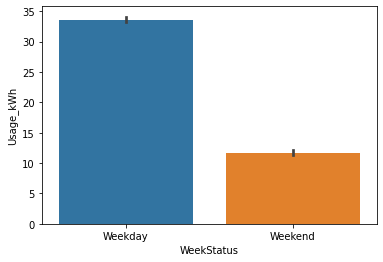

In [16]:
sns.barplot(x='WeekStatus',y='Usage_kWh',data=df)

<AxesSubplot:xlabel='WeekStatus', ylabel='Usage_kWh'>

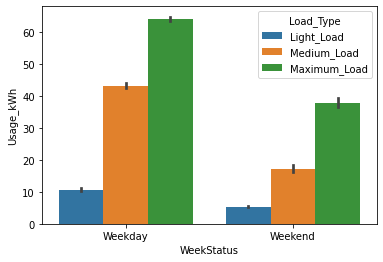

In [19]:
sns.barplot(x='WeekStatus',y='Usage_kWh',hue='Load_Type',data=df)

<AxesSubplot:xlabel='Load_Type', ylabel='Usage_kWh'>

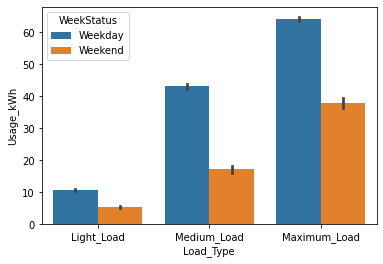

In [20]:
sns.barplot(hue='WeekStatus',y='Usage_kWh',x='Load_Type',data=df)

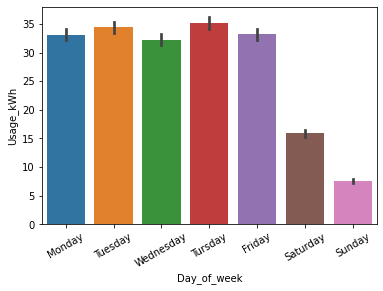

In [18]:
g=sns.barplot(x='Day_of_week',y='Usage_kWh',data=df)
g.set_xticklabels(labels=["Monday","Tuesday","Wednesday","Tursday","Friday","Saturday","Sunday"],rotation=30)
plt.show()

<AxesSubplot:xlabel='Lagging_Current_Reactive.Power_kVarh', ylabel='Usage_kWh'>

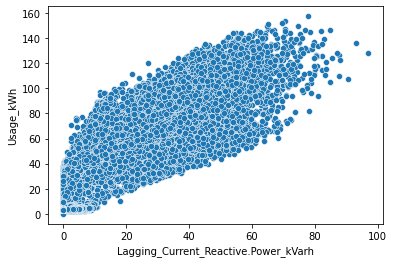

In [21]:
sns.scatterplot(x='Lagging_Current_Reactive.Power_kVarh',y='Usage_kWh',data=df)

<AxesSubplot:xlabel='Lagging_Current_Reactive.Power_kVarh', ylabel='Usage_kWh'>

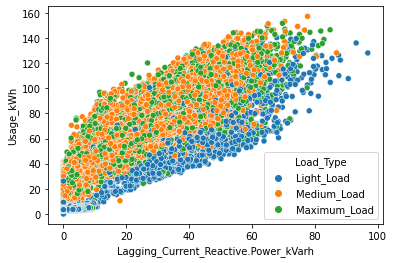

In [23]:
sns.scatterplot(x='Lagging_Current_Reactive.Power_kVarh',y='Usage_kWh',hue='Load_Type',data=df)

<AxesSubplot:xlabel='Lagging_Current_Reactive.Power_kVarh', ylabel='Usage_kWh'>

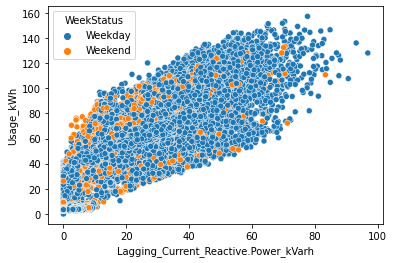

In [24]:
sns.scatterplot(x='Lagging_Current_Reactive.Power_kVarh',y='Usage_kWh',hue='WeekStatus',data=df)

<AxesSubplot:xlabel='Lagging_Current_Reactive.Power_kVarh', ylabel='Usage_kWh'>

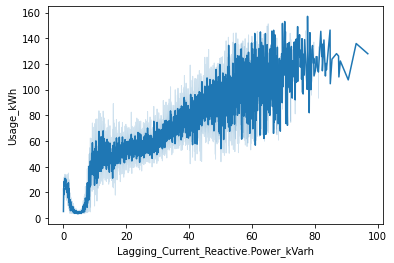

In [25]:
sns.lineplot(x='Lagging_Current_Reactive.Power_kVarh',y='Usage_kWh',data=df)

In [26]:
df['Load_Type'].value_counts()

Light_Load      18072
Medium_Load      9696
Maximum_Load     7272
Name: Load_Type, dtype: int64

In [30]:
df['Load_Type'].replace(to_replace="Light_Load",value=0,inplace=True)
df['Load_Type'].replace(to_replace="Medium_Load",value=1,inplace=True)
df['Load_Type'].replace(to_replace="Maximum_Load",value=2,inplace=True)

In [31]:
df['Load_Type'].value_counts()

0    18072
1     9696
2     7272
Name: Load_Type, dtype: int64

In [35]:
df['WeekStatus'].value_counts()

Weekday    25056
Weekend     9984
Name: WeekStatus, dtype: int64

In [36]:
df['WeekStatus'].replace(to_replace="Weekday",value=3,inplace=True)
df['WeekStatus'].replace(to_replace="Weekend",value=4,inplace=True)

In [37]:
df['WeekStatus'].value_counts()

3    25056
4     9984
Name: WeekStatus, dtype: int64

In [38]:
df['Day_of_week'].value_counts()

Monday       5088
Tuesday      4992
Wednesday    4992
Thursday     4992
Friday       4992
Saturday     4992
Sunday       4992
Name: Day_of_week, dtype: int64

In [39]:
df['Day_of_week'].replace(to_replace="Monday",value=0,inplace=True)
df['Day_of_week'].replace(to_replace="Tuesday",value=1,inplace=True)
df['Day_of_week'].replace(to_replace="Wednesday",value=2,inplace=True)
df['Day_of_week'].replace(to_replace="Thursday",value=3,inplace=True)
df['Day_of_week'].replace(to_replace="Friday",value=4,inplace=True)
df['Day_of_week'].replace(to_replace="Saturday",value=5,inplace=True)
df['Day_of_week'].replace(to_replace="Sunday",value=6,inplace=True)

In [40]:
df['Day_of_week'].value_counts()

0    5088
1    4992
2    4992
3    4992
4    4992
5    4992
6    4992
Name: Day_of_week, dtype: int64

In [41]:
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,Year,Mear
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,3,0,0,2018,1
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,3,0,0,2018,1
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,3,0,0,2018,1
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,3,0,0,2018,1
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,3,0,0,2018,1


In [60]:
X=df.drop(['date','Year','Usage_kWh','CO2(tCO2)'],axis=1)#independent
y=df['Usage_kWh']#dependent

In [61]:
X.head()

,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,Mear
0,2.95,0.0,73.21,100.0,900,3,0,0,1
1,4.46,0.0,66.77,100.0,1800,3,0,0,1
2,3.28,0.0,70.28,100.0,2700,3,0,0,1
3,3.56,0.0,68.09,100.0,3600,3,0,0,1
4,4.50,0.0,64.72,100.0,4500,3,0,0,1


In [62]:
y.head()

0    3.17
1    4.00
2    3.24
3    3.31
4    3.82
Name: Usage_kWh, dtype: float64

In [63]:
X.shape

(35040, 9)

In [64]:
y.shape

(35040,)

In [65]:
X.corr()

,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,Mear
Lagging_Current_Reactive.Power_kVarh,1.000000,-0.405142,0.144534,0.407716,8.266237e-02,-3.198698e-01,-2.562275e-01,0.451899,-4.213561e-02
Leading_Current_Reactive_Power_kVarh,-0.405142,1.000000,0.526770,-0.944039,3.716046e-01,2.604306e-01,2.129219e-01,0.001776,-2.709951e-02
Lagging_Current_Power_Factor,0.144534,0.526770,1.000000,-0.519967,5.652695e-01,5.408210e-02,4.246488e-02,0.519189,-8.705239e-02
Leading_Current_Power_Factor,0.407716,-0.944039,-0.519967,1.000000,-3.605630e-01,-3.146749e-01,-2.576774e-01,0.075394,-3.232157e-02
NSM,0.082662,0.371605,0.565270,-0.360563,1.000000e+00,-5.341257e-17,-1.052838e-16,0.482767,2.297820e-15
WeekStatus,-0.319870,0.260431,0.054082,-0.314675,-5.341257e-17,1.000000e+00,7.903022e-01,-0.199950,1.283896e-02
Day_of_week,-0.256227,0.212922,0.042465,-0.257677,-1.052838e-16,7.903022e-01,1.000000e+00,-0.168947,1.252494e-02
Load_Type,0.451899,0.001776,0.519189,0.075394,4.827670e-01,-1.999500e-01,-1.689472e-01,1.000000,-1.285381e-02
Mear,-0.042136,-0.027100,-0.087052,-0.032322,2.297820e-15,1.283896e-02,1.252494e-02,-0.012854,1.000000e+00


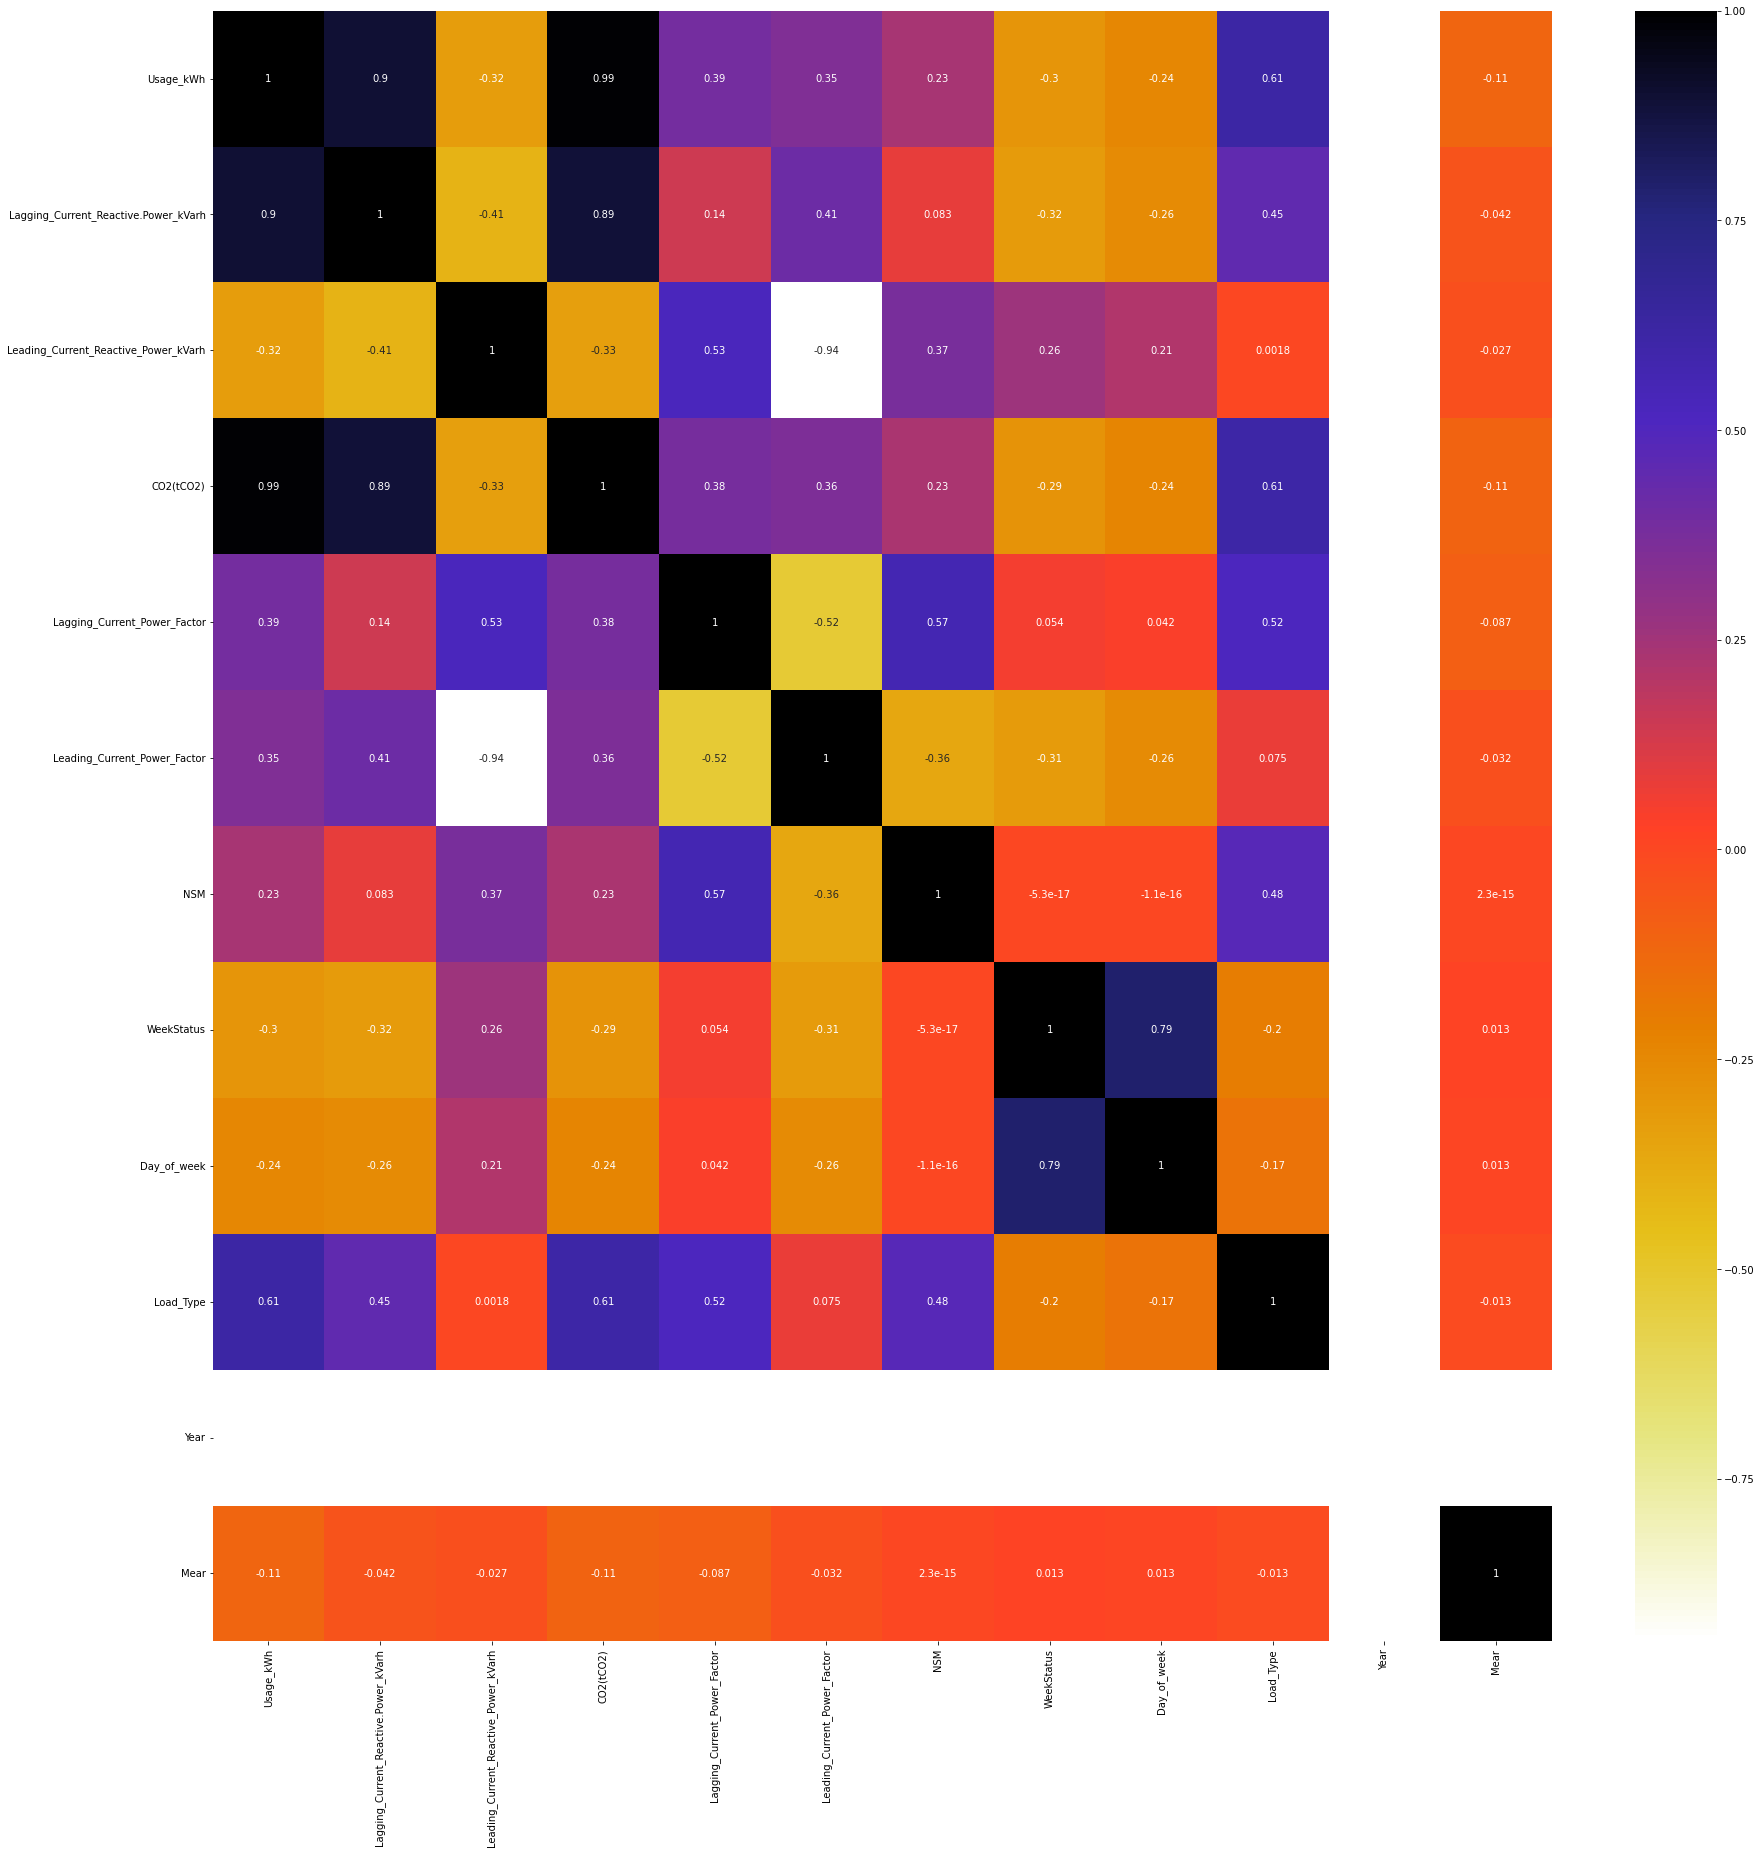

In [66]:
plt.figure(figsize=(30,30))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [67]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [68]:
corr_features = correlation(X, 0.8)
len(set(corr_features))

1

In [69]:
corr_features

{'Leading_Current_Power_Factor'}

In [70]:
X.head()

,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,Mear
0,2.95,0.0,73.21,100.0,900,3,0,0,1
1,4.46,0.0,66.77,100.0,1800,3,0,0,1
2,3.28,0.0,70.28,100.0,2700,3,0,0,1
3,3.56,0.0,68.09,100.0,3600,3,0,0,1
4,4.50,0.0,64.72,100.0,4500,3,0,0,1


In [71]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)#trainnig and testing data

In [72]:
X_train.head()

,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,Mear
24510,5.26,0.00,56.48,100.00,27900,3,3,0,9
11355,3.74,0.00,57.52,100.00,25200,4,6,0,4
32539,4.21,0.00,68.88,100.00,82800,3,2,2,12
18663,1.66,0.29,99.91,100.00,36000,4,5,1,7
33094,0.00,3.89,100.00,99.27,63900,3,1,2,12


In [74]:
X_test.head()

,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,Mear
11356,3.82,0.0,60.20,100.00,26100,4,6,0,4
26543,48.02,0.0,78.46,100.00,43200,3,3,2,10
2445,59.65,0.0,89.61,100.00,41400,3,4,2,1
14649,0.00,16.6,100.00,18.53,52200,4,5,0,6
32699,20.99,0.0,94.19,100.00,54000,3,4,1,12


In [75]:
y_train.head()

24510     3.60
11355     2.63
32539     4.00
18663    39.13
33094    32.11
Name: Usage_kWh, dtype: float64

In [76]:
y_test.head()

11356      2.88
26543     60.77
2445     120.42
14649      3.13
32699     58.86
Name: Usage_kWh, dtype: float64

In [77]:
X_train.shape

(24528, 9)

In [78]:
X_test.shape

(10512, 9)

In [79]:
y_train.shape

(24528,)

In [80]:
y_test.shape

(10512,)

In [81]:
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_test)

In [82]:
y_pred

array([  2.8837,  60.6537, 120.097 , ...,   3.068 ,   2.5863,   4.3952])

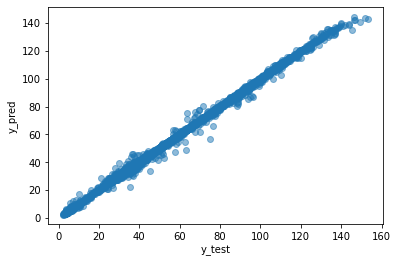

In [83]:
plt.scatter(y_test,y_pred,alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [84]:
print("MSE:",mean_squared_error(y_pred,y_test))
print("MAE:",mean_absolute_error(y_pred,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_pred,y_test)))

MSE: 0.7065361741210042
MAE: 0.2880443302891931
RMSE: 0.8405570617876006


In [85]:
X_test.head()

,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,Mear
11356,3.82,0.0,60.20,100.00,26100,4,6,0,4
26543,48.02,0.0,78.46,100.00,43200,3,3,2,10
2445,59.65,0.0,89.61,100.00,41400,3,4,2,1
14649,0.00,16.6,100.00,18.53,52200,4,5,0,6
32699,20.99,0.0,94.19,100.00,54000,3,4,1,12


In [86]:
y_test.head()

11356      2.88
26543     60.77
2445     120.42
14649      3.13
32699     58.86
Name: Usage_kWh, dtype: float64

In [88]:
prediction=rfr.predict([[3.82,0.0,60.20,100.00,26100,4,6,0,4]])
print("Energy consumption of the steel industry:",prediction)

Energy consumption of the steel industry: [2.8837]


C:\Users\Somesh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [89]:
prediction=rfr.predict([[48.02,0.0,78.46,100.00,43200,3,3,2,10]])
print("Energy consumption of the steel industry:",prediction)

Energy consumption of the steel industry: [60.6537]


C:\Users\Somesh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [90]:
import pickle
pickle.dump(rfr,open('Steel_Industry_Energy_Consumption.pkl','wb'))